In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.dpi'] = 100
# plt.rcParams['font.family'] = 'sans-serif'

df = pd.read_csv('cleaned/cleaned_nutrition_obesity_data.csv')
df_states = pd.read_csv('cleaned/cleaned_states_overall.csv')

print(f"Main dataset: {len(df):,} rows")
print(f"States overall dataset: {len(df_states):,} rows")
print(f"Years: {df['YearStart'].min()} - {df['YearStart'].max()}")
print(f"Classes: {df['Class'].unique()}")

Main dataset: 106,260 rows
States overall dataset: 3,519 rows
Years: 2011 - 2023
Classes: ['Obesity / Weight Status' 'Physical Activity' 'Fruits and Vegetables']


In [42]:
obesity_data = df_states[df_states['Class'] == 'Obesity / Weight Status'].copy()
activity_data = df_states[df_states['Class'] == 'Physical Activity'].copy()
nutrition_data = df_states[df_states['Class'] == 'Fruits and Vegetables'].copy()

obesity_trend = obesity_data.groupby('YearStart')['Data_Value'].mean()
activity_trend = activity_data.groupby('YearStart')['Data_Value'].mean()
nutrition_trend = nutrition_data.groupby('YearStart')['Data_Value'].mean()

print("Data prepared successfully")
print(f"Obesity data points: {len(obesity_data):,}")
print(f"Physical Activity data points: {len(activity_data):,}")
print(f"Nutrition data points: {len(nutrition_data):,}")

Data prepared successfully
Obesity data points: 1,326
Physical Activity data points: 1,887
Nutrition data points: 306


## Sub-Question 1: What are the main trends in adult obesity rates across U.S. states over time?

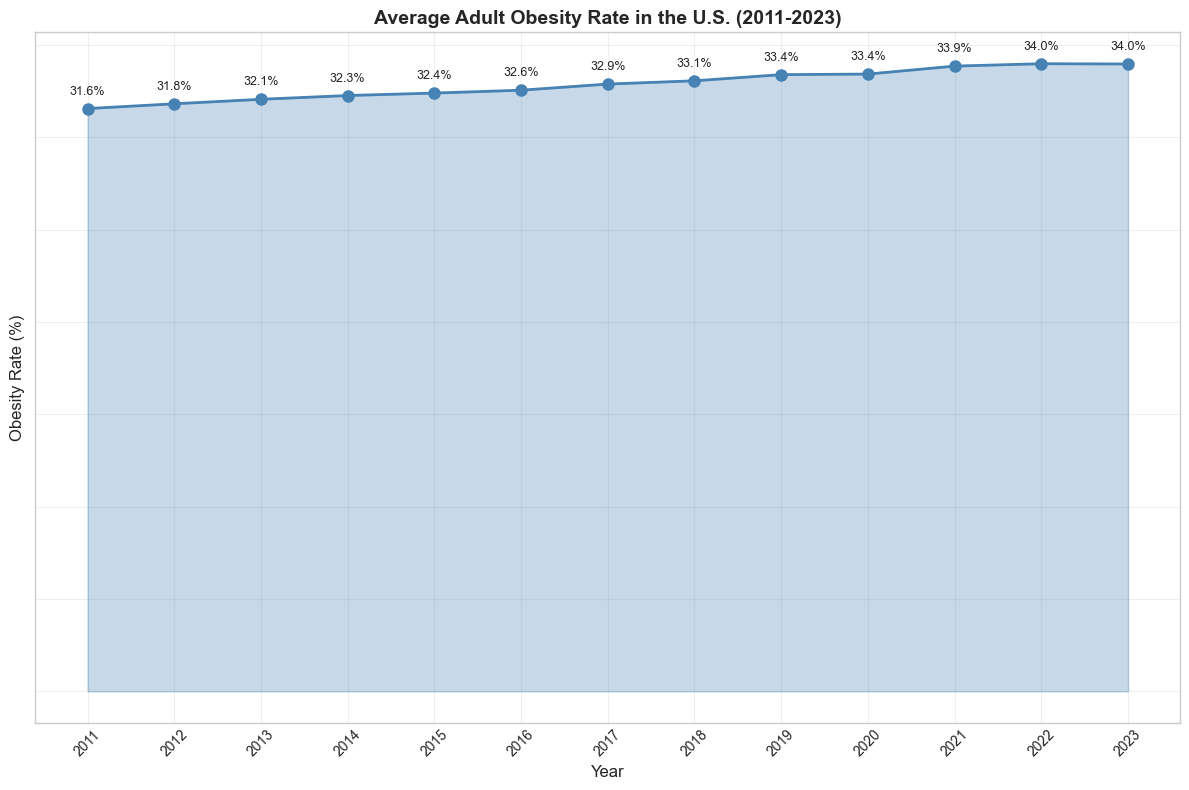

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

years = obesity_trend.index
values = obesity_trend.values

ax.plot(years, values, marker='o', linewidth=2, color='steelblue', markersize=8)
ax.fill_between(years, values, alpha=0.3, color='steelblue')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Obesity Rate (%)', fontsize=12)
ax.set_title('Average Adult Obesity Rate in the U.S. (2011-2023)', fontsize=14, fontweight='bold')
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)
ax.set_yticklabels([])
ax.grid(True, alpha=0.3)

for x, y in zip(years, values):
    ax.annotate(f'{y:.1f}%', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

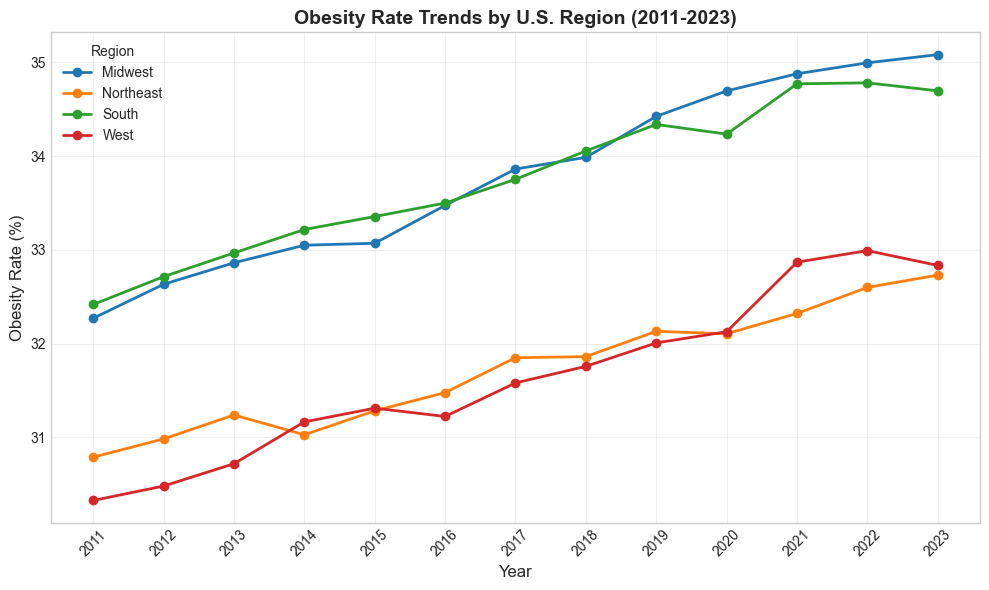

In [ ]:
obesity_by_region = obesity_data.groupby(['YearStart', 'Region'])['Data_Value'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i, region in enumerate(obesity_by_region.columns):
    ax.plot(obesity_by_region.index, obesity_by_region[region], 
            marker='o', linewidth=2, label=region, color=colors[i])

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Obesity Rate (%)', fontsize=12)
ax.set_title('Obesity Rate Trends by U.S. Region (2011-2023)', fontsize=14, fontweight='bold')
ax.legend(title='Region', loc='upper left')
ax.set_xticks(obesity_by_region.index)
ax.set_xticklabels(obesity_by_region.index, rotation=45)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Sub-Question 2: How have average physical activity levels and dietary habits changed from 2011 to 2023?

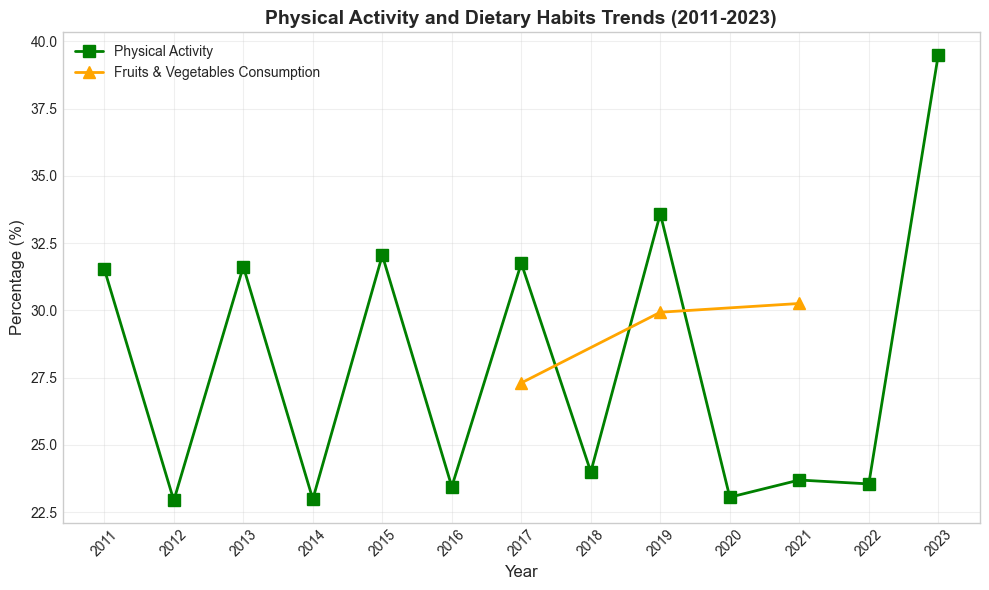

Physical Activity: 31.5% (2011) -> 39.5% (2023)
Nutrition: 27.3% (2017) -> 30.3% (2021)


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(activity_trend.index, activity_trend.values, marker='s', linewidth=2, 
        color='green', label='Physical Activity', markersize=8)
ax.plot(nutrition_trend.index, nutrition_trend.values, marker='^', linewidth=2, 
        color='orange', label='Fruits & Vegetables Consumption', markersize=8)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Physical Activity and Dietary Habits Trends (2011-2023)', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.set_xticks(activity_trend.index)
ax.set_xticklabels(activity_trend.index, rotation=45)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Physical Activity: {activity_trend.values[0]:.1f}% ({activity_trend.index[0]}) -> {activity_trend.values[-1]:.1f}% ({activity_trend.index[-1]})")
print(f"Nutrition: {nutrition_trend.values[0]:.1f}% ({nutrition_trend.index[0]}) -> {nutrition_trend.values[-1]:.1f}% ({nutrition_trend.index[-1]})")

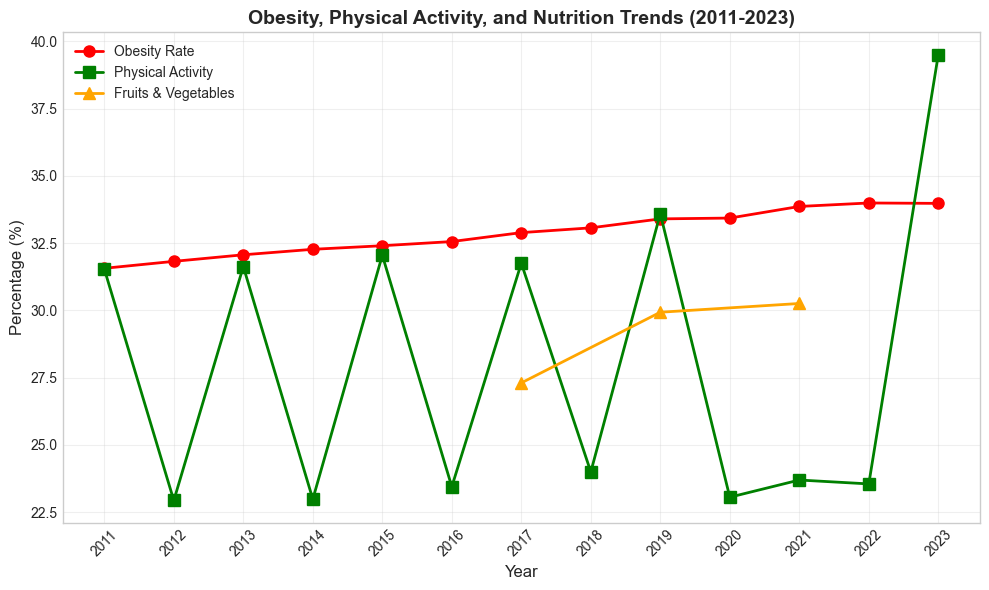

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(obesity_trend.index, obesity_trend.values, marker='o', linewidth=2, 
        color='red', label='Obesity Rate', markersize=8)
ax.plot(activity_trend.index, activity_trend.values, marker='s', linewidth=2, 
        color='green', label='Physical Activity', markersize=8)
ax.plot(nutrition_trend.index, nutrition_trend.values, marker='^', linewidth=2, 
        color='orange', label='Fruits & Vegetables', markersize=8)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Obesity, Physical Activity, and Nutrition Trends (2011-2023)', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.set_xticks(obesity_trend.index)
ax.set_xticklabels(obesity_trend.index, rotation=45)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Sub-Question 3: Which states or regions show the highest and lowest obesity prevalence?

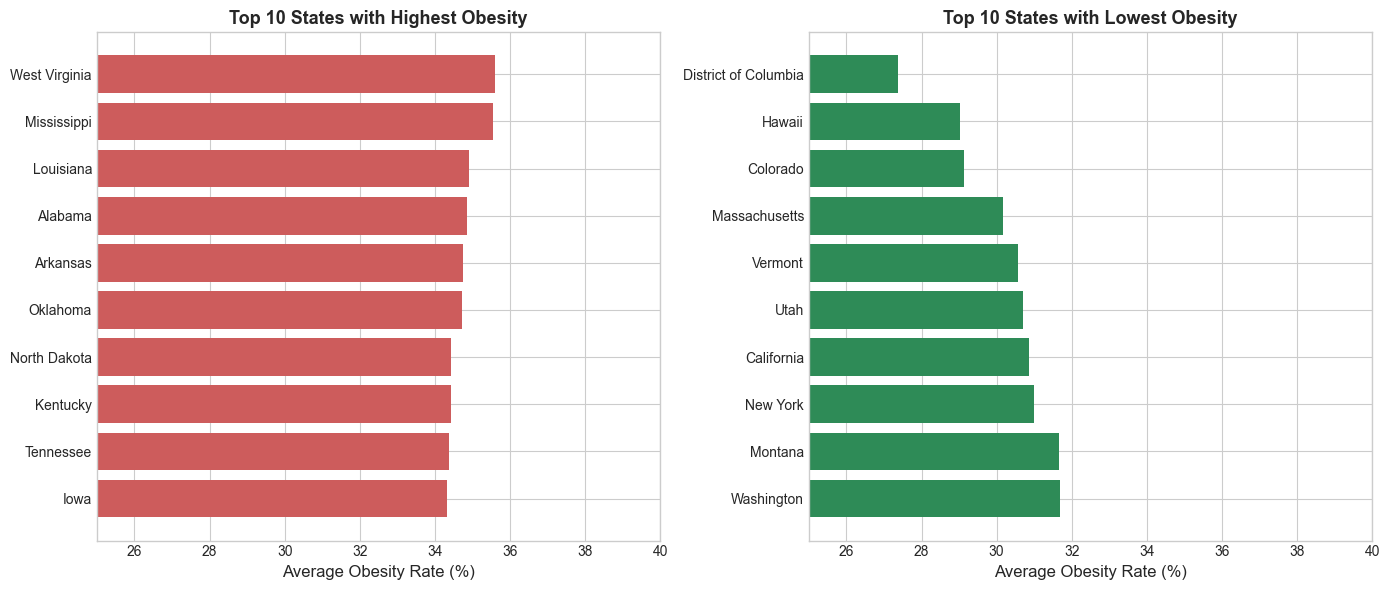

In [ ]:
state_avg_obesity = obesity_data.groupby('LocationDesc')['Data_Value'].mean().sort_values(ascending=False)

top_10 = state_avg_obesity.head(10)
bottom_10 = state_avg_obesity.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].barh(top_10.index[::-1], top_10.values[::-1], color='indianred')
axes[0].set_xlabel('Average Obesity Rate (%)', fontsize=12)
axes[0].set_title('Top 10 States with Highest Obesity', fontsize=13, fontweight='bold')
axes[0].set_xlim(25, 40)

axes[1].barh(bottom_10.index[:], bottom_10.values[:], color='seagreen')
axes[1].set_xlabel('Average Obesity Rate (%)', fontsize=12)
axes[1].set_title('Top 10 States with Lowest Obesity', fontsize=13, fontweight='bold')
axes[1].set_xlim(25, 40)

plt.tight_layout()
plt.show()

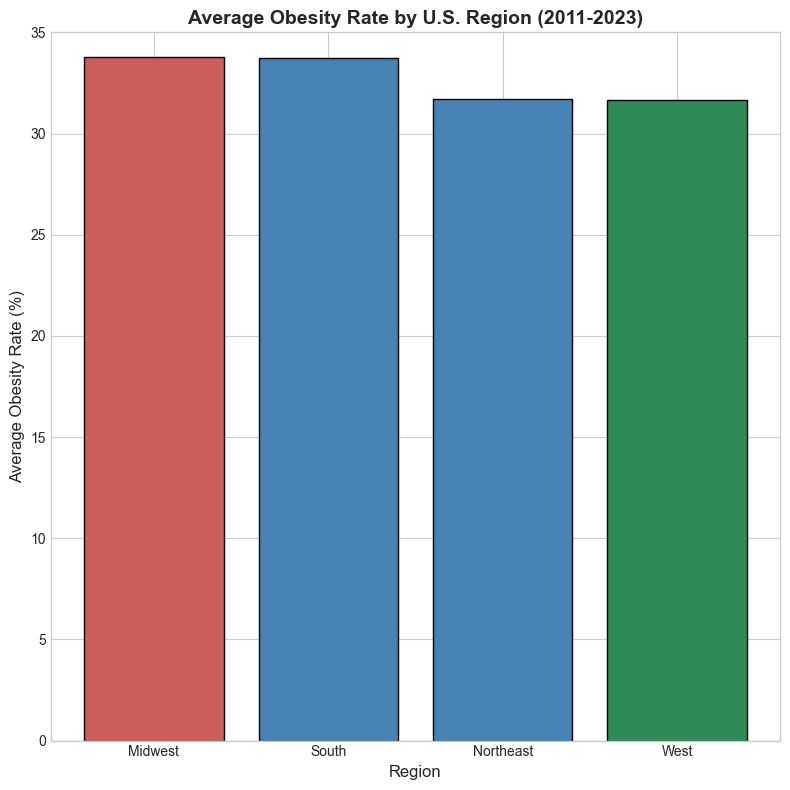

Highest: Midwest (33.8%)
Lowest: West (31.6%)


In [ ]:
region_avg_obesity = obesity_data.groupby('Region')['Data_Value'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))

colors = ['indianred' if v == region_avg_obesity.max() else 'seagreen' if v == region_avg_obesity.min() else 'steelblue' 
          for v in region_avg_obesity.values]

bars = ax.bar(region_avg_obesity.index, region_avg_obesity.values, color=colors, edgecolor='black')

ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Average Obesity Rate (%)', fontsize=12)
ax.set_title('Average Obesity Rate by U.S. Region (2011-2023)', fontsize=14, fontweight='bold')
ax.set_ylim(0, 35)

plt.tight_layout()
plt.show()

print(f"Highest: {region_avg_obesity.idxmax()} ({region_avg_obesity.max():.1f}%)")
print(f"Lowest: {region_avg_obesity.idxmin()} ({region_avg_obesity.min():.1f}%)")

In [ ]:
df_sex = pd.read_csv('cleaned/cleaned_by_sex.csv')
df_age = pd.read_csv('cleaned/cleaned_by_age.csv')
df_income = pd.read_csv('cleaned/cleaned_by_income.csv')
df_education = pd.read_csv('cleaned/cleaned_by_education.csv')

print("Loaded demographic datasets:")
print(f"By Sex: {len(df_sex):,} rows")
print(f"By Age: {len(df_age):,} rows")
print(f"By Income: {len(df_income):,} rows")
print(f"By Education: {len(df_education):,} rows")

Loaded demographic datasets:
By Sex: 7,590 rows
By Age: 22,770 rows
By Income: 26,565 rows
By Education: 15,180 rows


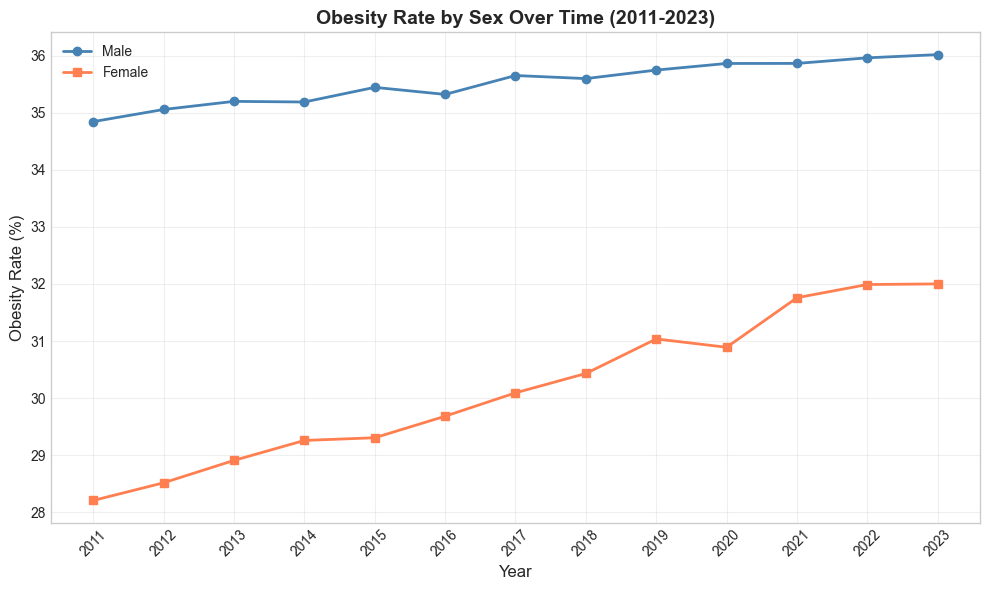

In [ ]:
obesity_by_sex = df_sex[df_sex['Class'] == 'Obesity / Weight Status'].copy()
sex_trend = obesity_by_sex.groupby(['YearStart', 'Sex'])['Data_Value'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(sex_trend.index, sex_trend['Male'], marker='o', linewidth=2, color='steelblue', label='Male')
ax.plot(sex_trend.index, sex_trend['Female'], marker='s', linewidth=2, color='coral', label='Female')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Obesity Rate (%)', fontsize=12)
ax.set_title('Obesity Rate by Sex Over Time (2011-2023)', fontsize=14, fontweight='bold')
ax.legend()
ax.set_xticks(sex_trend.index)
ax.set_xticklabels(sex_trend.index, rotation=45)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

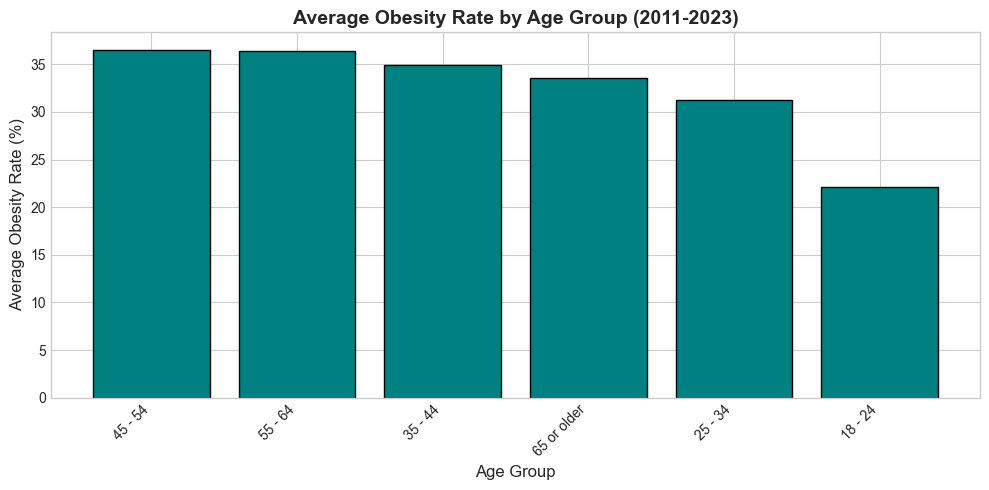

In [ ]:
obesity_by_age = df_age[df_age['Class'] == 'Obesity / Weight Status'].copy()
age_avg = obesity_by_age.groupby('Age_Years')['Data_Value'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))

bars = ax.bar(range(len(age_avg)), age_avg.values, color='teal', edgecolor='black')
ax.set_xticks(range(len(age_avg)))
ax.set_xticklabels(age_avg.index, rotation=45, ha='right')
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Average Obesity Rate (%)', fontsize=12)
ax.set_title('Average Obesity Rate by Age Group (2011-2023)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

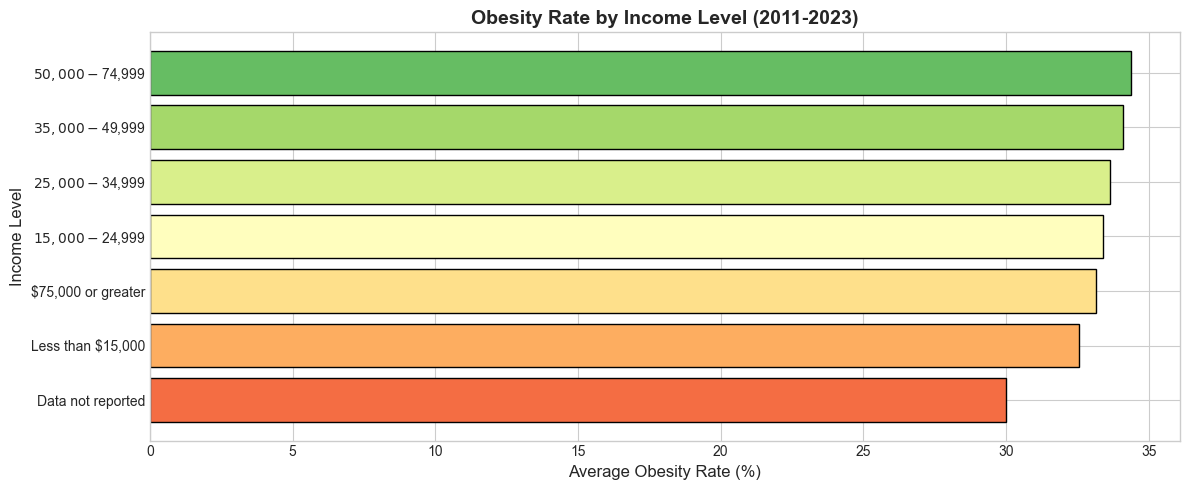

In [ ]:
obesity_by_income = df_income[df_income['Class'] == 'Obesity / Weight Status'].copy()
income_avg = obesity_by_income.groupby('Income')['Data_Value'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 5))

colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(income_avg)))
bars = ax.barh(income_avg.index[::-1], income_avg.values[::-1], color=colors[::-1], edgecolor='black')

ax.set_xlabel('Average Obesity Rate (%)', fontsize=12)
ax.set_ylabel('Income Level', fontsize=12)
ax.set_title('Obesity Rate by Income Level (2011-2023)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

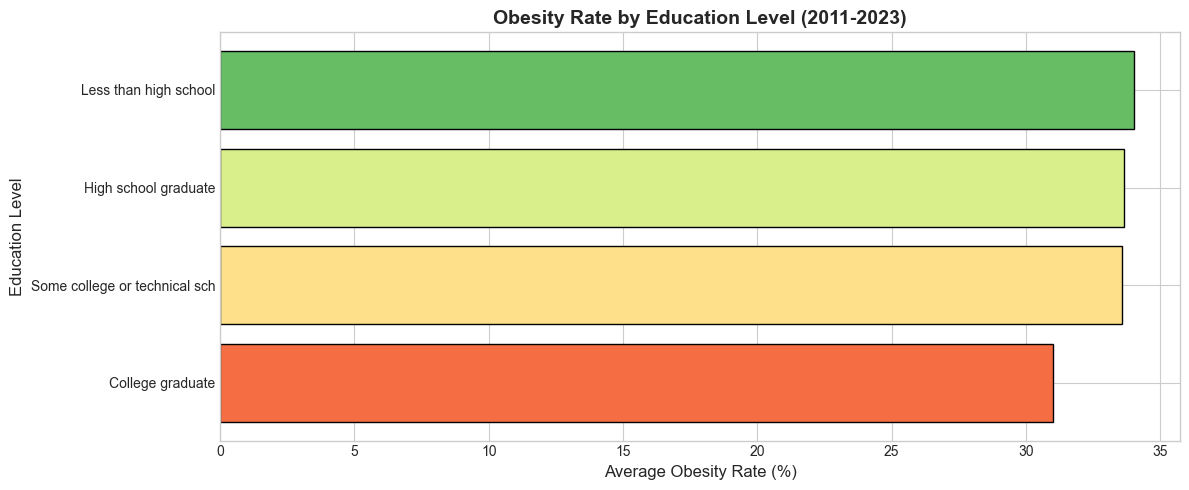

In [ ]:
obesity_by_edu = df_education[df_education['Class'] == 'Obesity / Weight Status'].copy()
edu_avg = obesity_by_edu.groupby('Education')['Data_Value'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 5))

colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(edu_avg)))
bars = ax.barh(edu_avg.index[::-1], edu_avg.values[::-1], color=colors[::-1], edgecolor='black')

ax.set_xlabel('Average Obesity Rate (%)', fontsize=12)
ax.set_ylabel('Education Level', fontsize=12)
ax.set_title('Obesity Rate by Education Level (2011-2023)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## U.S. Obesity Map by State

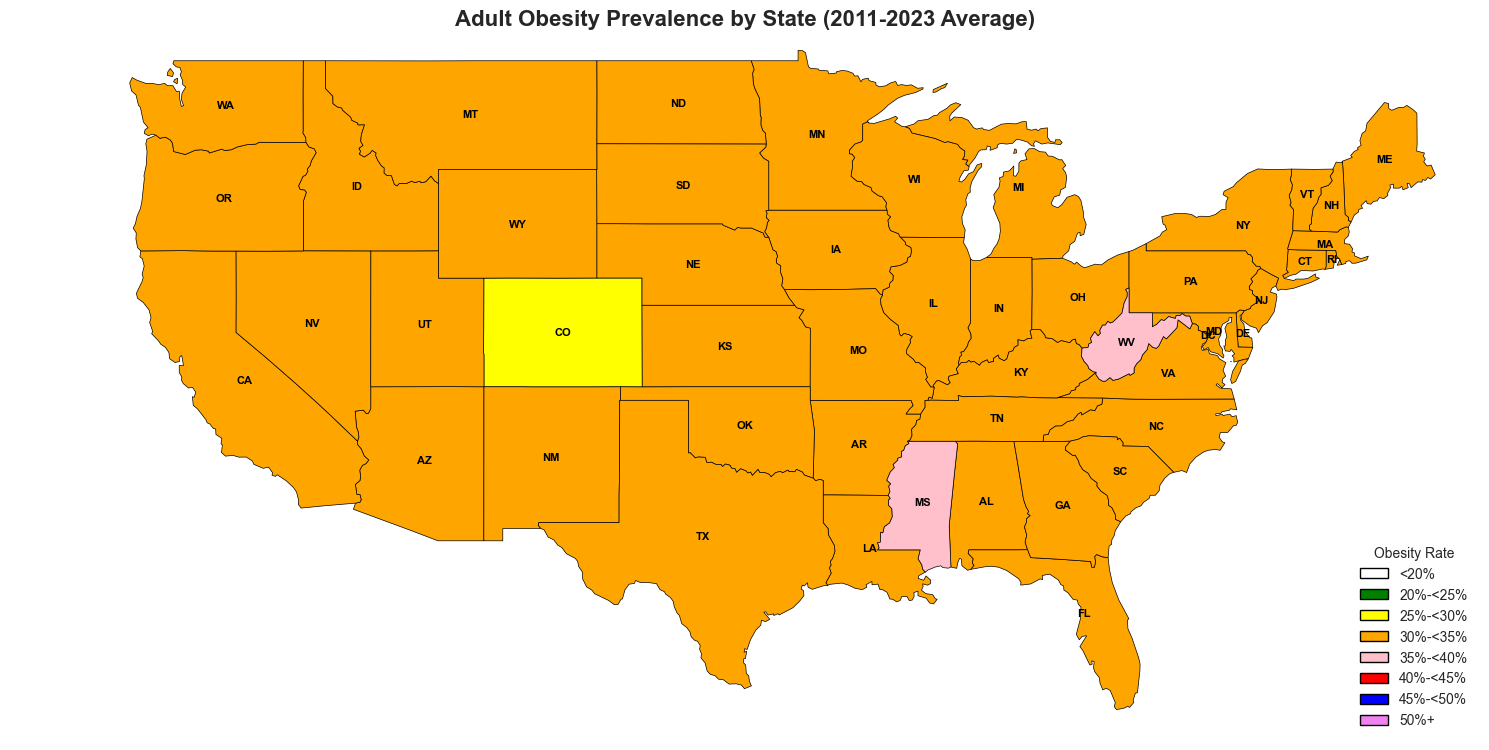

In [81]:
import geopandas as gpd
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import ScalarMappable

state_obesity_avg = obesity_data.groupby('LocationAbbr')['Data_Value'].mean().reset_index()
state_obesity_avg.columns = ['state', 'obesity_rate']
usa = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")

state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

usa['state'] = usa['name'].map(state_abbr)
usa_merged = usa.merge(state_obesity_avg, on='state', how='left')
bounds = [0, 20, 25, 30, 35, 40, 45, 50, 100]
colors = ['white', 'green', 'yellow', 'orange', 'pink', 'red', 'blue', 'violet']
cmap = plt.cm.colors.ListedColormap(colors)
norm = BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
usa_continental = usa_merged[~usa_merged['state'].isin(['AK', 'HI'])]
usa_continental.plot(column='obesity_rate', ax=ax, cmap=cmap, norm=norm, 
                     edgecolor='black', linewidth=0.5)

for idx, row in usa_continental.iterrows():
    if row['state'] and pd.notna(row.geometry.centroid.x):
        ax.annotate(row['state'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    ha='center', va='center', fontsize=8, fontweight='bold', color='black')

ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)
ax.set_axis_off()
ax.set_title('Adult Obesity Prevalence by State (2011-2023 Average)', fontsize=16, fontweight='bold')

legend_labels = ['<20%', '20%-<25%', '25%-<30%', '30%-<35%', '35%-<40%', '40%-<45%', '45%-<50%', '50%+']
legend_patches = [mpatches.Patch(facecolor=colors[i], edgecolor='black', label=legend_labels[i]) 
                  for i in range(len(legend_labels))]
ax.legend(handles=legend_patches, loc='lower right', fontsize=10, title='Obesity Rate')

plt.tight_layout()
plt.show()